In [3]:
##YELP Restuarant dataset
##Anirban Das
##Seniment Analysis
##________________________________________

# Loading libraries and datasets

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline 

import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

**DATA SOURCE: https://www.yelp.com/dataset**

In [5]:
data_business = pd.read_json('C:\\Users\\mraer\\Desktop\\UW\\Semester 3\\Text Mining\\Homework Sentiment Analysis\\yelp_dataset\\yelp_academic_dataset_business.json', lines=True)
#data_checkin = pd.read_json('C:\\Users\\mraer\\Desktop\\UW\\Semester 3\\Text Mining\\Homework Sentiment Analysis\\yelp_dataset\\yelp_academic_dataset_checkin.json', lines=True)
#data_review = pd.read_json('C:\\Users\\mraer\\Desktop\\UW\\Semester 3\\Text Mining\\Homework Sentiment Analysis\\yelp_dataset\\yelp_academic_dataset_review.json', lines=True)
#data_tip = pd.read_json('C:\\Users\\mraer\\Desktop\\UW\\Semester 3\\Text Mining\\Homework Sentiment Analysis\\yelp_dataset\\yelp_academic_dataset_tip.json', lines=True)
#data_user = pd.read_json('C:\\Users\\mraer\\Desktop\\UW\\Semester 3\\Text Mining\\Homework Sentiment Analysis\\yelp_dataset\\yelp_academic_dataset_user.json', lines=True)

## review and user is 5 and 3 gb files, there is a memory error
## Will be trying to convert soon the files




In [6]:
data_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [7]:
data_business = data_business.drop(['hours','review_count', 'attributes', 'postal_code', 'latitude', 'longitude'], axis=1)

In [8]:
data_business.info()
data_business.describe()
data_business.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   business_id  150346 non-null  object 
 1   name         150346 non-null  object 
 2   address      150346 non-null  object 
 3   city         150346 non-null  object 
 4   state        150346 non-null  object 
 5   stars        150346 non-null  float64
 6   is_open      150346 non-null  int64  
 7   categories   150243 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 9.2+ MB


,business_id,name,address,city,state,stars,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,5.0,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,3.0,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,3.5,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,4.5,1,"Brewpubs, Breweries, Food"


In [9]:
business_explode = data_business.assign(categories= data_business.categories.str.split(',')).explode('categories')

In [10]:
business_explode #In here the categories are split

,business_id,name,address,city,state,stars,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,5.0,0,Doctors
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,5.0,0,Traditional Chinese Medicine
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,5.0,0,Naturopathic/Holistic
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,5.0,0,Acupuncture
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,5.0,0,Health & Medical
...,...,...,...,...,...,...,...,...
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,4.0,1,Bikes
150345,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,Apollo beach,FL,4.5,1,Beauty & Spas
150345,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,Apollo beach,FL,4.5,1,Permanent Makeup
150345,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,Apollo beach,FL,4.5,1,Piercing


In [11]:
business_explode.categories.value_counts()[:30] #Printing top 30 categories

categories
 Restaurants                  36978
 Food                         20998
 Shopping                     18915
Restaurants                   15290
 Home Services                10563
 Nightlife                     9990
 Beauty & Spas                 9907
 Bars                          9130
 Health & Medical              8832
 Local Services                8556
 Event Planning & Services     7828
 Automotive                    7324
Food                           6783
 Sandwiches                    6645
 American (Traditional)        6504
 Active Life                   5768
Shopping                       5480
 Coffee & Tea                  5153
 Breakfast & Brunch            5110
 Fast Food                     5073
 Pizza                         5027
 American (New)                4868
 Home & Garden                 4744
 Fashion                       4603
 Burgers                       4519
Beauty & Spas                  4385
 Hotels & Travel               4261
 Arts & Entertain

**Getting the vales only containing: Restaurants, Food, Bars, Food, Sandwiches, Coffee & Tea, Breakfast & Brunch, Fast Food, Pizza, Burgers.**

I tried but the file was getting huge 15+gbs and the processing time was huge too. So for now I am using just Restaurants.
If all types of food is needed, uncomment the below code.

In [12]:
# categories_to_check = ['Restaurants', 'Food', 'Bars', 'Food', 'Sandwiches', 'Coffee & Tea', 'Breakfast & Brunch', 'Fast Food', 'Pizza', 'Burgers']

# filtered_categories = business_explode[business_explode['categories'].str.contains('|'.join(categories_to_check), case=False, na=False)]
# #'|' is to check all categories it will match any string that contains 'Restaurants' OR 'Food' OR 'Bars'.
# category_counts = filtered_categories['categories'].value_counts()

# print(category_counts)


restaurants = business_explode[business_explode['categories'].str.contains('Restaurants',case=True, na=False)]

In [13]:
restaurants.head()
restaurants[restaurants['categories'].str.contains('Restaurants',case=True, na=False)].categories.value_counts()

categories
 Restaurants           36978
Restaurants            15290
 Pop-Up Restaurants       60
Pop-Up Restaurants        15
Name: count, dtype: int64

**As the Reviews are huge, we are considering to just take Restuarant/Food/bar related ones**

# Merging with Reviews data

In [14]:
size = 100000
review_path = 'C:\\Users\\mraer\\Desktop\\UW\\Semester 3\\Text Mining\\Homework Sentiment Analysis\\yelp_dataset\\yelp_academic_dataset_review.json'
review = pd.read_json(review_path, lines=True,
                     dtype={'review_id':str,'user_id':str,
                            'business_id':str,
                           'stars':int,
                           'text':str,
                           'useful':int,
                           'funny':int, 'cool':int},
                     chunksize=size)



In [15]:
chunk_list = []
for chunk_review in review:
    # Drop columns that aren't needed
    chunk_review = chunk_review.drop(['review_id'], axis=1)
    # Renaming column name to avoid conflict with business overall star rating
    chunk_review = chunk_review.rename(columns={'stars': 'review_stars'})
    # Inner merge with edited business file so only reviews related to the business remain
    chunk_merged = pd.merge(restaurants, chunk_review, on='business_id', how='inner')
    # Show feedback on progress
    print(f"{chunk_merged.shape[0]} out of {size:,} related reviews")
    chunk_list.append(chunk_merged)
# After trimming down the review file, concatenate all relevant data back to one dataframe
data = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)



72187 out of 100,000 related reviews
72367 out of 100,000 related reviews
71264 out of 100,000 related reviews
67476 out of 100,000 related reviews
63479 out of 100,000 related reviews
61860 out of 100,000 related reviews
59910 out of 100,000 related reviews
72857 out of 100,000 related reviews
74573 out of 100,000 related reviews
74118 out of 100,000 related reviews
70601 out of 100,000 related reviews
65868 out of 100,000 related reviews
63161 out of 100,000 related reviews
60501 out of 100,000 related reviews
71768 out of 100,000 related reviews
73977 out of 100,000 related reviews
74044 out of 100,000 related reviews
71090 out of 100,000 related reviews
66474 out of 100,000 related reviews
61248 out of 100,000 related reviews
61065 out of 100,000 related reviews
70081 out of 100,000 related reviews
72845 out of 100,000 related reviews
72097 out of 100,000 related reviews
67723 out of 100,000 related reviews
62954 out of 100,000 related reviews
60944 out of 100,000 related reviews
5

In [16]:
data.head()


,business_id,name,address,city,state,stars,is_open,categories,user_id,review_stars,useful,funny,cool,text,date
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,6_SpY41LIHZuIaiDs5FMKA,4,0,0,1,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,tCXElwhzekJEH6QJe3xs7Q,4,3,1,2,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,WqfKtI-aGMmvbA9pPUxNQQ,5,0,0,0,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,3-1va0IQfK-9tUMzfHWfTA,5,5,0,5,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,EouCKoDfzaVG0klEgdDvCQ,4,2,1,1,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,2013-10-25 02:31:35


In [17]:
data.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'stars', 'is_open',
       'categories', 'user_id', 'review_stars', 'useful', 'funny', 'cool',
       'text', 'date'],
      dtype='object')

In [18]:
data.drop(['user_id'], axis=1)

,business_id,name,address,city,state,stars,is_open,categories,review_stars,useful,funny,cool,text,date
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,4,0,0,1,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,4,3,1,2,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,5,0,0,0,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,5,5,0,5,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,4,2,1,1,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,2013-10-25 02:31:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4728603,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,4.5,1,Restaurants,5,1,0,1,This food truck was stupid. Stupidly delicious...,2021-06-25 23:22:26
4728604,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,4.5,1,Restaurants,5,0,0,0,Bubba never disappoints i go to his fb page an...,2016-12-09 21:38:05
4728605,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,4.5,1,Restaurants,1,0,0,0,The truck was invited to our office for a part...,2020-02-19 22:59:06
4728606,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,4.5,1,Restaurants,4,0,0,0,Plum Pit came and did my niece's graduation pa...,2021-06-07 02:55:04


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4728608 entries, 0 to 4728607
Data columns (total 15 columns):
 #   Column        Dtype         
---  ------        -----         
 0   business_id   object        
 1   name          object        
 2   address       object        
 3   city          object        
 4   state         object        
 5   stars         float64       
 6   is_open       int64         
 7   categories    object        
 8   user_id       object        
 9   review_stars  int32         
 10  useful        int32         
 11  funny         int32         
 12  cool          int32         
 13  text          object        
 14  date          datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(4), int64(1), object(8)
memory usage: 469.0+ MB


**Just saving the data to CSV**

In [20]:
data.to_csv("C:\\Users\\mraer\\Desktop\\UW\\Semester 3\\Text Mining\\Homework Sentiment Analysis\\restaurants.csv", index=False)

In [21]:
data.drop(['date'], axis=1)

,business_id,name,address,city,state,stars,is_open,categories,user_id,review_stars,useful,funny,cool,text
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,6_SpY41LIHZuIaiDs5FMKA,4,0,0,1,This is nice little Chinese bakery in the hear...
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,tCXElwhzekJEH6QJe3xs7Q,4,3,1,2,This is the bakery I usually go to in Chinatow...
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,WqfKtI-aGMmvbA9pPUxNQQ,5,0,0,0,"A delightful find in Chinatown! Very clean, an..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,3-1va0IQfK-9tUMzfHWfTA,5,5,0,5,I ordered a graduation cake for my niece and i...
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,EouCKoDfzaVG0klEgdDvCQ,4,2,1,1,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4728603,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,4.5,1,Restaurants,lDyhGApbGZ0_BoeJzRQq7g,5,1,0,1,This food truck was stupid. Stupidly delicious...
4728604,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,4.5,1,Restaurants,-TTJ75--0NEAjvFCOV7rBg,5,0,0,0,Bubba never disappoints i go to his fb page an...
4728605,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,4.5,1,Restaurants,8yFNNU7UmQcfzmcTvzTlOA,1,0,0,0,The truck was invited to our office for a part...
4728606,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,4.5,1,Restaurants,uvBkI-2pOW0gg8yee7YvdA,4,0,0,0,Plum Pit came and did my niece's graduation pa...


# Testing Vader Score

In [22]:
def sentiment_scores(df):
    snt = analyser.polarity_scores(df)  #call the polarity analyzer
    print("{:-<40} {}".format(df, str(snt)))

In [23]:
sentiment_scores("This is nice little Chinese bakery and I never had any idea about Chinese bakery but it was amazing!")

This is nice little Chinese bakery and I never had any idea about Chinese bakery but it was amazing! {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.8122}


## Using Vader Scoring techniques in the dataset

In [24]:
%time # to calulate the time it takes the algorithm to compute a VADER score
i=0 # counter

compval1 = [ ] # empty list to hold our computed 'compound' VADER scores

while (i<len(data)):

    k = analyser.polarity_scores(data.iloc[i]['text'])
    compval1.append(k['compound'])
    
    i = i+1
    
# convert sentiment values to numpy for easier usage
compval1 = np.array(compval1)
len(compval1)

CPU times: total: 0 ns
Wall time: 0 ns


4728608

In [25]:
data['Vader score'] = compval1

In [26]:

data.to_csv("C:\\Users\\mraer\\Desktop\\UW\\Semester 3\\Text Mining\\Homework Sentiment Analysis\\restaurants_scoring.csv", index=False)

In [27]:
data.head(30)

,business_id,name,address,city,state,stars,is_open,categories,user_id,review_stars,useful,funny,cool,text,date,Vader score
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,6_SpY41LIHZuIaiDs5FMKA,4,0,0,1,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53,0.9390
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,tCXElwhzekJEH6QJe3xs7Q,4,3,1,2,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06,0.8905
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,WqfKtI-aGMmvbA9pPUxNQQ,5,0,0,0,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57,0.9770
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,3-1va0IQfK-9tUMzfHWfTA,5,5,0,5,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57,0.8828
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,EouCKoDfzaVG0klEgdDvCQ,4,2,1,1,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,2013-10-25 02:31:35,-0.7212
5,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,KQSRUu4Aapl0hG6eu2v8iw,4,1,0,0,This is my favorite bakery in Chinatown! I usu...,2018-03-17 23:47:25,0.9391
6,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,X_DkwPTzdO_VWzUcbUXREg,3,0,0,0,so I dropped in to this store since it was the...,2012-08-16 19:42:17,0.8988
7,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,qUfRCH5NUyRDsJfM6jA5PQ,4,3,4,10,Impression: The good thing is that there are l...,2017-04-20 12:37:09,0.9801
8,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,gNJNxucGoZ31nlH74EQpPg,4,0,0,0,Best egg tarts? \n\nI was lucky to get them fr...,2014-02-25 14:41:08,0.9810
9,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,NMOxipsnXc6olWdHYzXiYA,4,0,0,0,Little square cakes of happiness with cute bun...,2012-01-10 02:09:18,0.9840


In [28]:
%time

# assign score categories and logic
i = 0

predicted_value = [ ] # empty series to hold our predicted values

while(i<len(data)):
    if ((data.iloc[i]['Vader score'] >= 0.7)):
        predicted_value.append('positive')
        i = i+1
    elif ((data.iloc[i]['Vader score'] > 0) & (data.iloc[i]['Vader score'] < 0.7)):
        predicted_value.append('neutral')
        i = i+1
    elif ((data.iloc[i]['Vader score'] <= 0)):
        predicted_value.append('negative')
        i = i+1

CPU times: total: 0 ns
Wall time: 0 ns


In [29]:
data['predicted_value']= predicted_value


In [30]:
data.head(30)

,business_id,name,address,city,state,stars,is_open,categories,user_id,review_stars,useful,funny,cool,text,date,Vader score,predicted_value
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,6_SpY41LIHZuIaiDs5FMKA,4,0,0,1,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53,0.9390,positive
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,tCXElwhzekJEH6QJe3xs7Q,4,3,1,2,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06,0.8905,positive
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,WqfKtI-aGMmvbA9pPUxNQQ,5,0,0,0,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57,0.9770,positive
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,3-1va0IQfK-9tUMzfHWfTA,5,5,0,5,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57,0.8828,positive
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,EouCKoDfzaVG0klEgdDvCQ,4,2,1,1,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,2013-10-25 02:31:35,-0.7212,negative
5,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,KQSRUu4Aapl0hG6eu2v8iw,4,1,0,0,This is my favorite bakery in Chinatown! I usu...,2018-03-17 23:47:25,0.9391,positive
6,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,X_DkwPTzdO_VWzUcbUXREg,3,0,0,0,so I dropped in to this store since it was the...,2012-08-16 19:42:17,0.8988,positive
7,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,qUfRCH5NUyRDsJfM6jA5PQ,4,3,4,10,Impression: The good thing is that there are l...,2017-04-20 12:37:09,0.9801,positive
8,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,gNJNxucGoZ31nlH74EQpPg,4,0,0,0,Best egg tarts? \n\nI was lucky to get them fr...,2014-02-25 14:41:08,0.9810,positive
9,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,NMOxipsnXc6olWdHYzXiYA,4,0,0,0,Little square cakes of happiness with cute bun...,2012-01-10 02:09:18,0.9840,positive


In [31]:
i = 0
stars = []

while (i<len(data)):
    if ((data.iloc[i]['review_stars'] >= 4)):
        stars.append('positive')
        i=i+1
    elif ((data.iloc[i]['review_stars'] == 3)):
        stars.append('neutral')
        i=i+1
        
    elif ((data.iloc[i]['review_stars'] <=2)):
        stars.append('negative')
        i=i+1

In [32]:
stars

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 '

In [33]:
data['stars_sentiment'] = stars

In [34]:
data.head(30)

,business_id,name,address,city,state,stars,is_open,categories,user_id,review_stars,useful,funny,cool,text,date,Vader score,predicted_value,stars_sentiment
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,6_SpY41LIHZuIaiDs5FMKA,4,0,0,1,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53,0.9390,positive,positive
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,tCXElwhzekJEH6QJe3xs7Q,4,3,1,2,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06,0.8905,positive,positive
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,WqfKtI-aGMmvbA9pPUxNQQ,5,0,0,0,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57,0.9770,positive,positive
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,3-1va0IQfK-9tUMzfHWfTA,5,5,0,5,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57,0.8828,positive,positive
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,EouCKoDfzaVG0klEgdDvCQ,4,2,1,1,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,2013-10-25 02:31:35,-0.7212,negative,positive
5,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,KQSRUu4Aapl0hG6eu2v8iw,4,1,0,0,This is my favorite bakery in Chinatown! I usu...,2018-03-17 23:47:25,0.9391,positive,positive
6,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,X_DkwPTzdO_VWzUcbUXREg,3,0,0,0,so I dropped in to this store since it was the...,2012-08-16 19:42:17,0.8988,positive,neutral
7,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,qUfRCH5NUyRDsJfM6jA5PQ,4,3,4,10,Impression: The good thing is that there are l...,2017-04-20 12:37:09,0.9801,positive,positive
8,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,gNJNxucGoZ31nlH74EQpPg,4,0,0,0,Best egg tarts? \n\nI was lucky to get them fr...,2014-02-25 14:41:08,0.9810,positive,positive
9,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,1,Restaurants,NMOxipsnXc6olWdHYzXiYA,4,0,0,0,Little square cakes of happiness with cute bun...,2012-01-10 02:09:18,0.9840,positive,positive


<Axes: xlabel='predicted_value'>

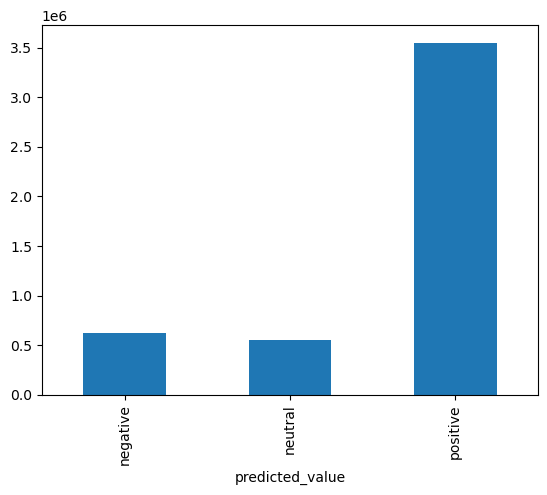

In [35]:
data.groupby('predicted_value').size().plot(kind='bar')

## Predicted Sentiment from Review vs Given Stars

In [36]:
pos = data[data['predicted_value'] == data['stars_sentiment']]

**Predicted sentiment versus the stars sentiment**

In [37]:
len(pos)/len(data)

0.7422074318700134

**Miss-classified Review vs Stars**

In [38]:
neg = data[data['predicted_value'] != data['stars_sentiment']]

In [39]:
len(neg)/len(data)

0.2577925681299867

## Word cloud

In [40]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt 

In [41]:
df2 = data[data['predicted_value']=='negative']

words = ' '.join(df2['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

stopwords = set(STOPWORDS)
stopwords.add("restaurant")
stopwords.add("food")
stopwords.add("place")
#stopwords.add("plane")
#stopwords.add("now")



In [43]:
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

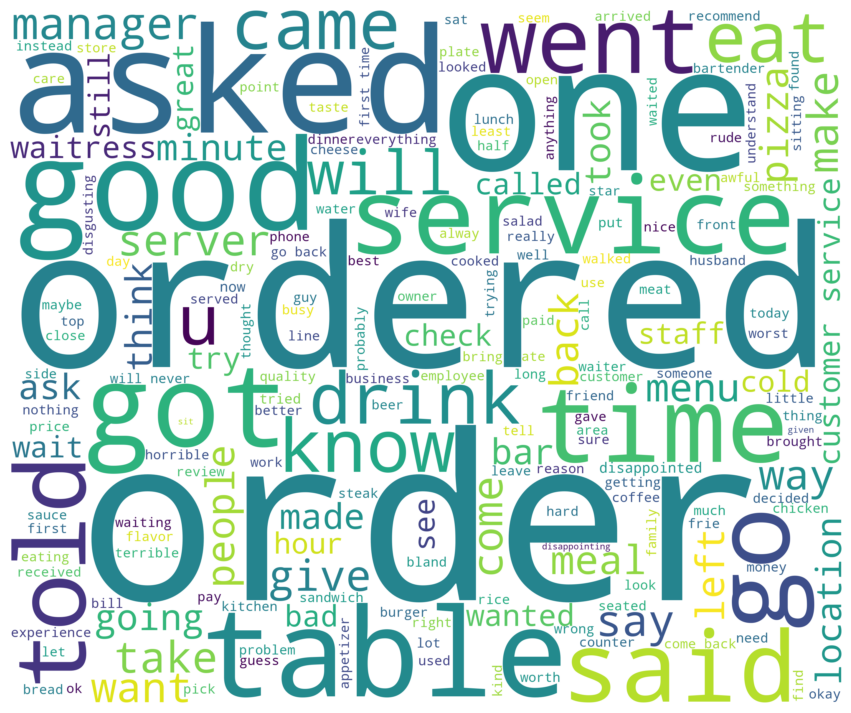

In [44]:
# plt.figure(1,figsize=(12, 12))
# plt.imshow(wordcloud)
# plt.axis('off')

plt.figure(figsize=(18, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.show()

Could have done the positive word cloud but it has about 75% reviews with over 3 million remarks.

Important to note here that the word cloud contains dominant recurrence of same word in different form (ex: Order - Ordered, say-said, go-went, etc.,). To mitigate this issue, Stemming could have been a better option.